In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset(path):
    return pd.read_csv(path)


VW_DATASET_PATH = os.path.join('vw.csv')

data = load_dataset(VW_DATASET_PATH)

# Quick look at the Dataset
How is the data structured? Does it contain the target variable?

In [3]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


We can see that the target variable **price** is included there

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


First insights:
- 15157 observations
- 9 features
- no missing data
- some features are categorical and some features are numerical

# Inspecting Categorical Features

In [5]:
class CatInspector:

    def inspect_unique(dataset):
        for col in dataset.columns:
            unique_cat = dataset[col].unique()
            print(f"feature {col} has {len(unique_cat)} categories")
    
    def inspect_categories(dataset, cat_list):
        for cat in cat_list:
            print(f"feature {cat} has the following categories: {dataset[cat].unique()}")
            print('---')
        
# inspecting unique values of each feature
CatInspector.inspect_unique(data)

feature model has 27 categories
feature year has 21 categories
feature price has 3970 categories
feature transmission has 3 categories
feature mileage has 10760 categories
feature fuelType has 4 categories
feature tax has 32 categories
feature mpg has 86 categories
feature engineSize has 12 categories


- As seen before, *model*, *transmission* and *fuelType* are categorical with a limited number of unique values
- It seems as also engineSize, despite being a number, can be treated as a categorical attribute

I am going to focus on such categorical attributes to inspect their unique values:

In [6]:
categorical = ['model', 'transmission', 'fuelType', 'engineSize']

CatInspector.inspect_categories(data, categorical)

feature model has the following categories: [' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle' ' Caddy Maxi Life' ' Caravelle' ' Touareg'
 ' Arteon' ' Touran' ' Golf SV' ' Amarok' ' Tiguan Allspace' ' Shuttle'
 ' Jetta' ' CC' ' California' ' Caddy Life' ' Caddy' ' Caddy Maxi' ' Eos'
 ' Fox']
---
feature transmission has the following categories: ['Automatic' 'Manual' 'Semi-Auto']
---
feature fuelType has the following categories: ['Diesel' 'Petrol' 'Other' 'Hybrid']
---
feature engineSize has the following categories: [2.  1.5 1.  1.6 0.  1.4 3.2 1.2 1.9 1.8 2.5 3. ]
---


Perhaps using an ordinal encoder for *engineSize* would make sense,
for example using 0 for the lowest engine and 10 for the highest one (more powerful engine)

# Inspecting Numerical Features

In [7]:
# the following method gives statistics about the numerical attributes
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


Main insights:
- average registration year is 2017. The oldest car is 2000 while the newest is 2020
- average price is £16838. Cheapest car is £900, most expensive is £70000.
- average spread of price from the mean is £7755
- on average a car from this dataset has traveled 22 miles. The most used one did 212 miles.
- The average car does about 58 miles per gallon


it is still useful to include *engineSize* to see what is the average power of cars (1.6)

However I am going to get a list of what I want to be my numerical attributes:

In [8]:
numerical = [feat for feat in data.columns if feat not in categorical]  # rapidly getting numerical attributes
numerical

['year', 'price', 'mileage', 'tax', 'mpg']

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'tax'}>],
       [<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'engineSize'}>]], dtype=object)

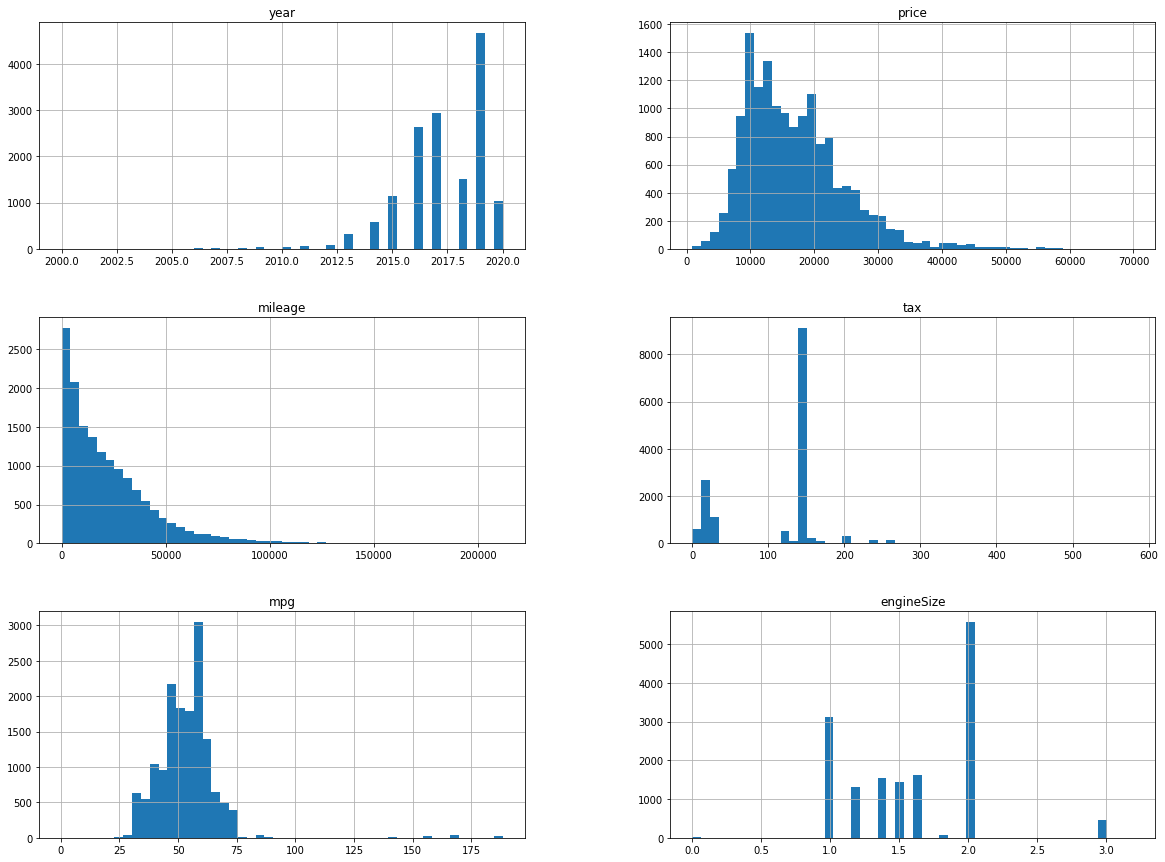

In [9]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))


Main insights:
- mileage and price are tail-heavy
- features have different scales

# CREATE TEST SET

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [11]:
def count_obs_train_test(train_set, test_set):
    train_obs = train_set.shape[0]
    test_obs = test_set.shape[0]
    return train_obs, test_obs


train_obs, test_obs = count_obs_train_test(train_set, test_set)
print("training set has {} observations".format(train_obs))
print("test set has {} observations".format(test_obs))
    

training set has 12125 observations
test set has 3032 observations


# EXPLORE TRAINING SET

In [12]:
# making a copy of the training set for exploration purposes

data = train_set.copy()
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10355,Tiguan,2017,19498,Semi-Auto,33183,Diesel,145,57.6,2.0
6281,Passat,2016,7492,Manual,127000,Diesel,20,67.3,2.0
13752,Touareg,2019,44990,Semi-Auto,4481,Diesel,145,34.0,3.0
2984,Golf,2017,11500,Semi-Auto,57600,Petrol,30,55.4,1.4
11808,Tiguan,2019,20449,Manual,12229,Petrol,145,40.9,1.5
...,...,...,...,...,...,...,...,...,...
5191,Golf,2015,11299,Manual,24959,Petrol,30,53.3,1.4
13418,Caravelle,2019,39950,Automatic,7583,Diesel,145,32.8,2.0
5390,Golf,2019,18995,Automatic,8044,Other,145,43.5,1.5
860,Golf,2019,16650,Manual,12900,Petrol,145,49.6,1.0


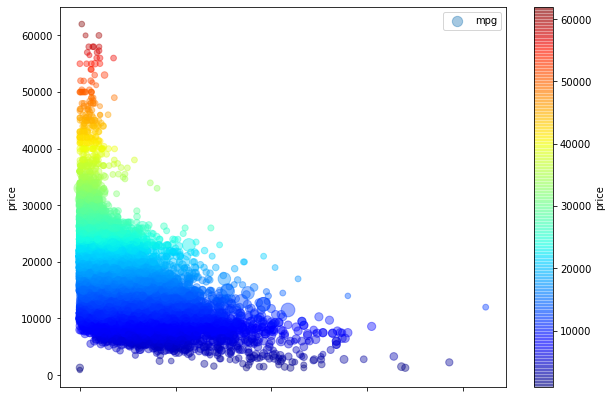

In [13]:
# scatter plot mileage vs price with radius of circles indicating tax
data.plot(kind='scatter', x='mileage', y='price', alpha=0.4, s='mpg', label='mpg',
          figsize=(10, 7), c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.xlabel('mileage')
plt.show()

the higher the mileage, the lower the price

## Correlations

In [14]:
# calculating standard correlation coefficient (Pearson's r) between every pair of attributes
corr_matrix = data.corr()

# focusing on how much each attribute correlaes to price
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
year          0.614843
engineSize    0.577174
tax           0.481551
mpg          -0.500065
mileage      -0.515365
Name: price, dtype: float64

Main insights:

Positive correlations:
- **price vs year** --> the newer the car (higher year), the higher the price. This is the strongest correlation
- **price vs engineSize** --> the more powerful the car (higher engine), the higher the price.
- **price vs tax** --> the higher the tax, the higher the price.

Negative correlations:
- **price vs mileage** --> the more used the car (higher mileage), the lower the price.
- **price vs mpg** --> the more miles the car does with 1 gallon (3.7 liters), the lower the price. We may wonder why
a car which is less efficient in terms of mpg, costs more. This probably depends on engineSize also. Because if the car is more powerful, it also consumes more fuel than less powerful cars, but its price will be higher due to more power of the engine.

Let's now look deeper at correlations between numerical attributes pairs:

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='mileage', ylabel='year'>,
        <AxesSubplot:xlabel='tax', ylabel='year'>,
        <AxesSubplot:xlabel='mpg', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='mileage', ylabel='price'>,
        <AxesSubplot:xlabel='tax', ylabel='price'>,
        <AxesSubplot:xlabel='mpg', ylabel='price'>],
       [<AxesSubplot:xlabel='year', ylabel='mileage'>,
        <AxesSubplot:xlabel='price', ylabel='mileage'>,
        <AxesSubplot:xlabel='mileage', ylabel='mileage'>,
        <AxesSubplot:xlabel='tax', ylabel='mileage'>,
        <AxesSubplot:xlabel='mpg', ylabel='mileage'>],
       [<AxesSubplot:xlabel='year', ylabel='tax'>,
        <AxesSubplot:xlabel='price', ylabel='tax'>,
        <AxesSubplot:xlabel='mileage', ylabel='tax'>,
        <AxesSubplot:xlabel='tax',

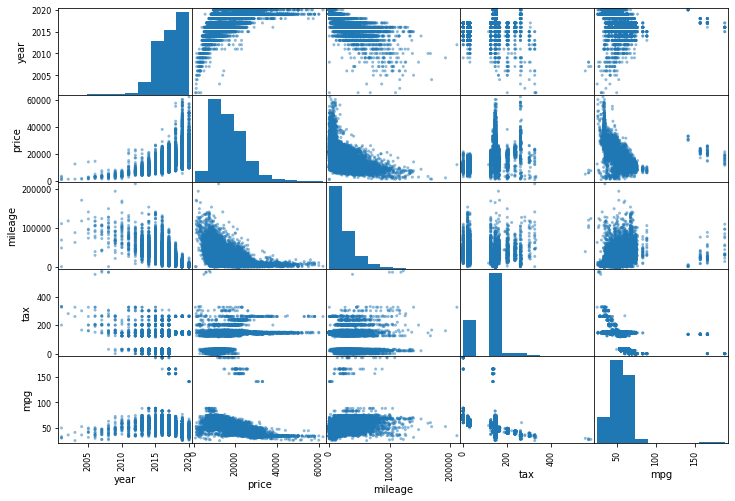

In [15]:
from pandas.plotting import scatter_matrix

# we already have a list of numerical attributes
scatter_matrix(data[numerical], figsize=(12,8))


We see two most promising predictors of price:
**year** and **mileage** 

Let's look more deeply at those two correlations:

<AxesSubplot:xlabel='year', ylabel='price'>

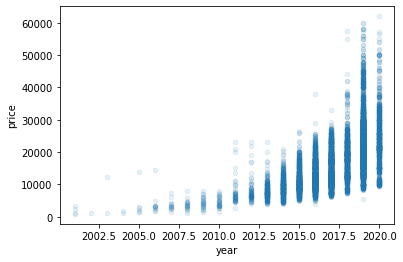

In [16]:
data.plot(kind='scatter', x='year', y='price', alpha=0.1)

the most dense (and longest) column of observation is the one of year 2019, which means
cars registrated in 2019 are the most recurrent

Let's check that:

In [17]:
data['year'].value_counts().head(3)

# cars registered in 2019 are indeed the most frequent ones

2019    3746
2017    2345
2016    2086
Name: year, dtype: int64

<AxesSubplot:xlabel='mileage', ylabel='price'>

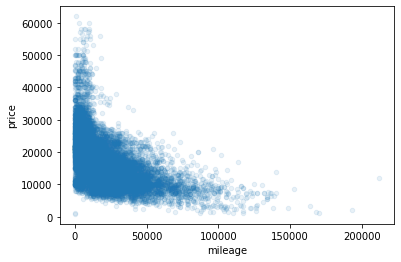

In [18]:
data.plot(kind='scatter', x='mileage', y='price', alpha=0.1)

Most mileage values are in the range 0-80000\
Most prices are in the range 6000-35000

# FEATURE ENGINEERING (*preparing data for ML models*)

## separating predictors and labels

In [19]:
# data will be the training set without the column of the target variable
data = train_set.drop("price", axis=1)

# only getting the target variable and assign it to another variable
data_labels = train_set["price"].copy()

## handling categorical attributes
- I am going to use an ordinal encoder for the feature engineSize
- For the rest of the features, I will use one hot encoding

In [20]:
# double checking if there are missing data

data.isnull().sum()
#data.isnull().values.sum() if I just want to get the total

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [21]:
# I am going to create two separate lists for categorical ordinal (engineSize) and categorical nominal
categorical_nominal = [c for c in categorical if c != 'engineSize']
categorical_ordinal = ['engineSize']

at this point we have numerical attributes, categorical nominal attributes and one categorical ordinal attribute.\
These three types of features must be transformed differently in the pipeline.
- numerical features will be scaled
- categorical nominal features will be encoded with one hot encoding
- categorical ordinal feature will be encoded with ordinal encoder

Let's first define a unique **Pipeline** for all of them:

In [22]:
## removing label from previously defined numerical attributes

numerical = [c for c in numerical if c != 'price']
numerical

['year', 'mileage', 'tax', 'mpg']

## Pipeline for feature transformation

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder


full_pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), numerical),
    ("categorical nominal", OneHotEncoder(), categorical_nominal),
    ("categorical ordinal", OrdinalEncoder(), categorical_ordinal),
])

data_prepared = full_pipeline.fit_transform(data)

# Training and Evaluating on Training Set

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data_prepared, data_labels)

LinearRegression()

### checking the first 5 predictions

In [25]:
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', lr.predict(some_data_prepared))
print()
print('Labels: ', list(some_labels))

Predictions:  [20196.97443891  7667.2220443  36898.48585654 13874.69798803
 22447.45469232]

Labels:  [19498, 7492, 44990, 11500, 20449]


### Measuring RMSE on whole Training Set

In [26]:
from sklearn.metrics import mean_squared_error

# predicting on whole training set: it will return a prediction for each observation
data_predictions = lr.predict(data_prepared)

# finding the mse as sum of the squared differences between actual and predicted prices
lin_mse = mean_squared_error(data_labels, data_predictions)
# finding now the root of the mse
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2562.094074159236

### evaluate with Cross Validation

In [27]:
def display_scores(scores, type_of_model):
    print("{} Scores:".format(type_of_model), scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [28]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lr, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores, 'Linear Regression')

Linear Regression Scores: [2476.13017416 2733.13821401 2647.21817781 2608.02041788 2575.9187758
 2498.52943223 2641.94613424 2489.57730954 2475.71534159 2600.21760018]
Mean:  2574.6411577440026
Standard Deviation:  83.19149372915363


The Linear Regressor has a score of 2574 +/- 83\
Using cross validation allows us to have such interval that we would not have if using a single validation set

## Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(data_prepared, data_labels)

DecisionTreeRegressor()

### evaluate on training set

In [30]:
data_predictions = dtr.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

224.00811719080696

### evaluate with Cross Validation

In [31]:
tree_scores = cross_val_score(dtr, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores, 'Decision Tree Regressor')

Decision Tree Regressor Scores: [2005.02990017 2225.90317154 2053.21064251 2140.22246958 1944.30413904
 2267.57891243 2277.72874177 2108.08178896 2095.04239094 2090.45867463]
Mean:  2120.7560831566257
Standard Deviation:  104.14518633706388


Decision Tree Regressor has a score of 2124 +/- 90\
We see how evaluation on whole training set was too optimistic,\
while evaluating through cross-validation gives an higher rmse,\
which is still lower than the one returned by Linear Regression

So far, Decision Tree Regressor performs better than Linear Regressor\
However, the model is overfitting the training set because we see that\
it peforms way better on full training set (rmse 224) than validation sets (rmse 2124)

## Random Forest Regression

In [32]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(data_prepared, data_labels)

RandomForestRegressor()

### evaluate on training set

In [33]:
data_predictions = rfr.predict(data_prepared)
rf_mse = mean_squared_error(data_labels, data_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

639.2030567632272

### evaluate with Cross Validation

In [34]:
rf_scores = cross_val_score(rfr, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)
display_scores(rf_rmse_scores, 'Random Forest')

Random Forest Scores: [1519.5673767  1788.23618166 1554.42810039 1730.62342972 1565.43138843
 1740.94619849 1799.12987078 1685.7320356  1666.73585025 1694.07939902]
Mean:  1674.4909831031841
Standard Deviation:  93.2312146930182


Random Forest performs even better, however it stills overfits\
the training set as we see a significant difference in performance\
when using cross validation, which gives an average score of 1671 +/- 94

# HYPERPARAMETER TUNING

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

rfr_ht = RandomForestRegressor()
grid_search = GridSearchCV(rfr_ht, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(data_prepared, data_labels)

NameError: name 'grid_searh' is not defined

In [36]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [38]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

### accessing the evaluation scores for all combinations

In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1989.8685414441888 {'max_features': 2, 'n_estimators': 3}
1763.802454786342 {'max_features': 2, 'n_estimators': 10}
1717.7268856193475 {'max_features': 2, 'n_estimators': 30}
1997.662283812487 {'max_features': 4, 'n_estimators': 3}
1781.7820540473538 {'max_features': 4, 'n_estimators': 10}
1701.928763411251 {'max_features': 4, 'n_estimators': 30}
1959.0638421947358 {'max_features': 6, 'n_estimators': 3}
1757.1637127513384 {'max_features': 6, 'n_estimators': 10}
1698.325258288692 {'max_features': 6, 'n_estimators': 30}
1910.8418477054636 {'max_features': 8, 'n_estimators': 3}
1733.295680046393 {'max_features': 8, 'n_estimators': 10}
1683.004733106149 {'max_features': 8, 'n_estimators': 30}
1979.4518164306992 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1835.3628672454117 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1942.0022197930978 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1859.2199769345982 {'bootstrap': False, 'max_features': 3, 'n_estim

we see that the best solution is given by hyperparameter max features set to 8\
and hyperparameters n_estimators set to 30, that return the lowest rmse of 1683

### trying Randomized Search instead of Grid Search

In [50]:
from sklearn.model_selection import RandomizedSearchCV

rfr_ht = RandomForestRegressor()
rand_search = RandomizedSearchCV(rfr_ht, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rand_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
rand_search.best_params_

In [ ]:
rand_search.best_estimator_

# INSPECTING BEST MODEL

In [39]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
# will return an array of 39 element
# keep in mind the addition of dummy variables after one hot encoding

array([1.59872392e-01, 1.24185330e-01, 6.67676434e-02, 2.67692236e-01,
       1.44132317e-03, 2.60262988e-03, 1.16329463e-03, 3.69497216e-04,
       3.95034556e-05, 2.49507203e-04, 3.12046780e-05, 1.22536720e-03,
       8.06283299e-03, 1.48243002e-02, 8.01633547e-05, 2.38873584e-05,
       8.15747101e-03, 8.51891199e-04, 2.65031735e-04, 2.51399368e-03,
       4.18755679e-02, 1.04938798e-03, 9.57254000e-04, 9.13816730e-04,
       1.81787007e-03, 3.72551155e-03, 7.91072883e-03, 1.09316754e-03,
       2.63082377e-02, 1.70572832e-03, 2.34774418e-02, 6.78626000e-03,
       7.31830678e-02, 5.79841351e-03, 8.68612038e-03, 2.68811359e-03,
       3.03110150e-04, 2.02943919e-02, 1.11006310e-01])

# EVALUATE ON TEST SET

In [42]:
final_model = grid_search.best_estimator_

# getting the predictors from test set
X_test = test_set.drop('price', axis=1)
# getting the label from test set
y_test = test_set["price"].copy()

# transforming columns (without fitting !)
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1584.7667171624362

## getting a measure of precision of generalization error

In [48]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
c_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(), 
        scale=stats.sem(squared_errors)))
c_interval

array([1493.94203855, 1670.66103118])

The **95 % confidence interval** for the **generalization error** of our Random Forest Regressor\
is **1493.9 to 1670.6**